In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import classification_report, plot_roc_curve, plot_precision_recall_curve

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\dheof\Desktop\Help\Purwadhika\Csv_Files\churn.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## EDA

In [3]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
df.describe(include=['object'])

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [6]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<AxesSubplot:xlabel='Exited', ylabel='count'>

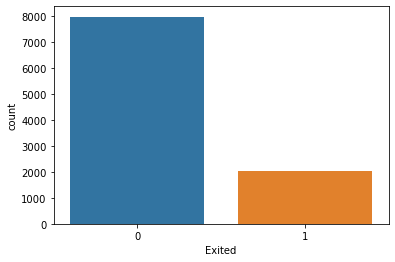

In [7]:
sns.countplot(df['Exited'])

In [8]:
print('Not churn', 7963 / 10000 * 100, '%')
print('Churn', 2037 / 10000 * 100, '%')

Not churn 79.63 %
Churn 20.369999999999997 %


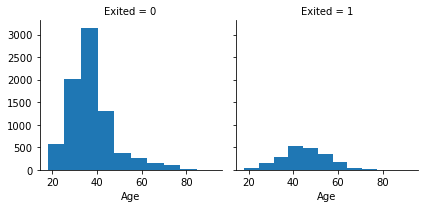

In [12]:
age_exited = sns.FacetGrid(df, col = 'Exited')
age_exited.map(plt.hist, 'Age')
plt.show()

In [24]:
df.groupby(['Exited','Gender'])['Exited'].count()

Exited  Gender
0       Female    3404
        Male      4559
1       Female    1139
        Male       898
Name: Exited, dtype: int64

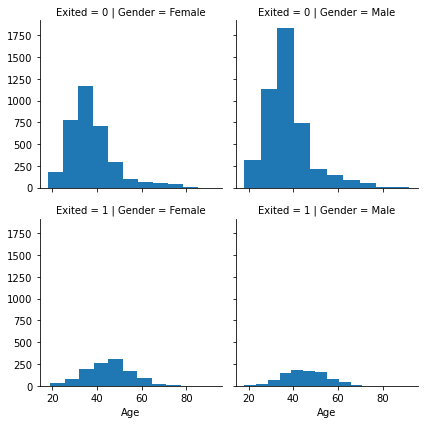

In [10]:
gender_exited = sns.FacetGrid(df, col = 'Gender', row = 'Exited')
gender_exited.map(plt.hist, 'Age')
plt.show()


<AxesSubplot:xlabel='Balance', ylabel='Exited'>

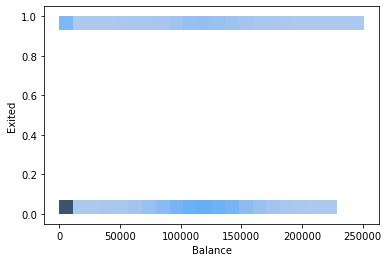

In [26]:
sns.histplot(data = df, y = 'Exited', x = 'Balance')

In [29]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

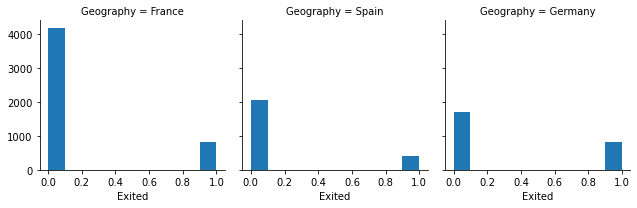

In [27]:
geo_exited = sns.FacetGrid(df, col= 'Geography')
geo_exited.map(plt.hist, 'Exited')
plt.show()

In [37]:
df[(df['Geography'] == 'Germany')&(df['Exited'] == 1)].shape

(814, 14)

In [38]:
df[(df['Geography'] == 'France')&(df['Exited'] == 1)].shape

(810, 14)

## Data Cleansing

In [39]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [40]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Data Splitting

In [41]:
x = df.drop(columns='Exited')
y = df['Exited']

In [44]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    stratify = y,
    test_size = 0.2,
    random_state = 0
)

In [47]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Prep

In [48]:
onehot = OneHotEncoder()
binary_encode = ce.BinaryEncoder()

transformer = ColumnTransformer(
    [
    ('one hot', onehot, ['Gender']),
    ('binary encoding', binary_encode, ['Geography']),
],
remainder = 'passthrough')

In [49]:
x_train_prep = transformer.fit_transform(x_train)
x_test_prep = transformer.transform(x_test)

## Tree

In [51]:
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(x_train_prep, y_train)

DecisionTreeClassifier(random_state=0)

In [52]:
tree_cv = cross_val_score(tree, x_train_prep, y_train, scoring = 'f1')
print(tree_cv)
print(tree_cv.mean())
print(tree_cv.std())

[0.48757764 0.52080123 0.52017937 0.51040222 0.50832073]
0.5094562379854103
0.012037872234923556


## Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rf = RandomForestClassifier(random_state=0)
rf.fit(x_train_prep, y_train)

RandomForestClassifier(random_state=0)

In [56]:
rf_cv = cross_val_score(rf, x_train_prep, y_train, scoring = 'f1')
print(rf_cv)
print(rf_cv.mean())
print(rf_cv.std())

[0.54       0.59230769 0.57088847 0.58113208 0.55319149]
0.5675039451900332
0.018834649978340112


## Adaboost

In [58]:
tree = DecisionTreeClassifier(random_state=0)
tree_ada = AdaBoostClassifier(
    tree,
    n_estimators = 200,
    learning_rate = 0.1,
    random_state = 0 
    )

tree_ada.fit(x_train_prep, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=0),
                   learning_rate=0.1, n_estimators=200, random_state=0)

In [59]:
tree_ada_cv = cross_val_score(tree_ada, x_train_prep, y_train, scoring = 'f1')
print(tree_ada_cv)
print(tree_ada_cv.mean())
print(tree_ada_cv.std())

[0.48902821 0.52307692 0.50299401 0.51396648 0.50759878]
0.5073328825721144
0.011365182409146406


## Gradient Boost

In [60]:
model_gb = GradientBoostingClassifier(
    n_estimators = 200,
    learning_rate = 0.1,
    random_state = 0
)

In [62]:
model_gb_cv = cross_val_score(model_gb, x_train_prep, y_train, scoring = 'f1')
print(model_gb_cv)
print(model_gb_cv.mean())
print(model_gb_cv.std())

[0.58076923 0.59774436 0.6025878  0.61678832 0.58100559]
0.5957790599602468
0.013675970882880561


## xgboosting

In [63]:
model_xgb = XGBClassifier(
    n_estimators = 200,
    learning_rate = 0.1,
    random_state = 0
)

In [66]:
import warnings
warnings.filterwarnings('ignore')


In [67]:

model_xgb_cv = cross_val_score(model_xgb, x_train_prep, y_train, scoring = 'f1')
print(model_xgb_cv)
print(model_xgb_cv.mean())
print(model_xgb_cv.std())

[14:49:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:49:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:49:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:50:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

#RF & GRADIENT BOOSTING

## Hyperparam Random Forest

In [77]:
rf = RandomForestClassifier()

hyperparam_space = {
    'n_estimators' : [int(i) for i in np.linspace(200, 2000, 10)],
    'max_features' : ['auto', 'sqrt'],
    'max_depth' : [int(i) for i in np.linspace(3, 12, 10)],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4],
    'bootstrap' : [True, False]
}

skf = StratifiedKFold(n_splits=5)

grid_search = RandomizedSearchCV(
    rf,
    param_distributions = hyperparam_space,
    cv = skf,
    scoring = 'f1', 
    n_jobs = -1
)

In [78]:
grid_search.fit(x_train_prep, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      11, 12],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   scoring='f1')

In [79]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.5644202979885854
{'n_estimators': 1400, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}


## Hyperparam gradient boost

In [92]:
tree = DecisionTreeClassifier()
gb = GradientBoostingClassifier()
model_gb = GradientBoostingClassifier(
    n_estimators = 200,
    learning_rate = 0.1,
    random_state = 0
    )

hyperparam_space = {
    'learning_rate' : [0.1, 0.5, 0.2],
    'n_estimators' : [200, 300, 400],
    'max_depth' : [2,3,5]
}

tune_gb = RandomizedSearchCV(
    model_gb,
    param_distributions = hyperparam_space,
    cv = skf,
    scoring = 'f1',
    n_jobs = -1
)

In [93]:
model_gb.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [94]:
tune_gb.fit(x_train_prep, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=GradientBoostingClassifier(n_estimators=200,
                                                        random_state=0),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.5, 0.2],
                                        'max_depth': [2, 3, 5],
                                        'n_estimators': [200, 300, 400]},
                   scoring='f1')

In [95]:
print(tune_gb.best_score_)
print(tune_gb.best_params_)

0.600908977495748
{'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.2}


In [98]:
print('Random Forest')
pd.DataFrame({
    '.':['Before Tuning', 'After Tuning'],
    'Score': [rf_cv.mean() ,grid_search.best_score_]
})

Random Forest


,.,Score
0,Before Tuning,0.567504
1,After Tuning,0.564420


In [99]:
print('Gradient Boost')
pd.DataFrame({
    '.':['Before Tuning', 'After Tuning'],
    'Score': [model_gb_cv.mean(), tune_gb.best_score_]
})

Gradient Boost


,.,Score
0,Before Tuning,0.595779
1,After Tuning,0.600909
